# Building a Model to Predict Housing Prices

**Vladyslav Honcharuk**

# [Index](#Index)

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)

##  Abstract

Determining the price of the house can be really useful when you buy one, you want to buy a house as cheap and as good at the same time as possible, but how to pay a real price for what you get. Machine Learning eases the process of determining the real price of the house, based on the data of properties of different houses and their price you can predict the price of the house with your desired properties. I have build a Machine Learning model to predict the price of the house and accomplished a score of almost 80% correctness of the prediction. To get such score the thorough data cleaning is needed and the right ML algorithm has to be chosen. I use the Linear Regression algorithm that allows to determine the value of the dependent target property based on the independent features.

[Back to top](#Index)


## 1. Introduction

The main goal of my project is to buid a model to predict housing prices with the help of Linear Regression, a linear model that assumes a linear relationship between independent variables and a dependent variable. Throughout the project I performed 3 main tasks - explored the dataset to become familiar with it, showed some overall and statistical insights and ploted several graphs, prepared the data by deleting and imputing the missing values, deleted redundant properties and discarded the outliers, built a correlation heatmap to discover the most correlated with the target property properties. Finally, I have described in detail what a Linear Regression is, built many models with different amount of variables for multi linear regression to find out the best one on a train set, and then used this model to predict the price of houses from the test set.

[Back to top](#Index)

## 2. The Data

[Back to top](#Index)

### 2.1 Import the Data


The first step of my project is to include all the necessary libraries that give some additional functionality to the Python programming language.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats

Next I am importing my dataset that is stored in a CSV file called houseSmallData. This is a dataset that contain different properties of houses and their price. Below are the top 5 instances of the dataset with their properties.

In [2]:
data = pd.read_csv('houseSmallData.csv')

data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


Before working with a dataset it's important to know what the names of the properties mean and what are the values they can store. Below are all of the properties with explanation of what data they contain and corresponding possible values they can represent. Also I removed the description of possible values of nominal vaues as I will not be using them in my project.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property
		
LotShape: General shape of property
       
LandContour: Flatness of the property
		
Utilities: Type of utilities available
	
LotConfig: Lot configuration

LandSlope: Slope of property
		
Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

BldgType: Type of dwelling
		
	
HouseStyle: Style of dwelling
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof
		
RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
ExterCond: Evaluates the present condition of the material on the exterior
		
Foundation: Type of foundation
		
BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality
		
GarageType: Garage location

GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality
		
GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
Fence: Fence quality
		
MiscFeature: Miscellaneous feature not covered in other categories
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
SaleCondition: Condition of sale

Lets have a look at some overall and statistical infomation about dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Id             100 non-null    int64  
 2   MSSubClass     100 non-null    int64  
 3   MSZoning       100 non-null    object 
 4   LotFrontage    86 non-null     float64
 5   LotArea        100 non-null    int64  
 6   Street         100 non-null    object 
 7   Alley          6 non-null      object 
 8   LotShape       100 non-null    object 
 9   LandContour    100 non-null    object 
 10  Utilities      100 non-null    object 
 11  LotConfig      100 non-null    object 
 12  LandSlope      100 non-null    object 
 13  Neighborhood   100 non-null    object 
 14  Condition1     100 non-null    object 
 15  Condition2     100 non-null    object 
 16  BldgType       100 non-null    object 
 17  HouseStyle     100 non-null    object 
 18  OverallQual

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,100.0,49.500000,29.011492,0.0,24.75,49.5,74.25,99.0
Id,100.0,50.500000,29.011492,1.0,25.75,50.5,75.25,100.0
MSSubClass,100.0,52.000000,42.545282,20.0,20.00,45.0,60.00,190.0
LotFrontage,86.0,71.406977,21.093840,21.0,60.00,70.0,84.00,122.0
LotArea,100.0,10115.870000,5130.541763,1596.0,7643.25,9595.5,11243.25,50271.0
OverallQual,100.0,5.980000,1.530696,3.0,5.00,6.0,7.00,10.0
OverallCond,100.0,5.500000,0.979590,2.0,5.00,5.0,6.00,8.0
YearBuilt,100.0,1971.410000,29.373284,1910.0,1954.75,1970.0,2000.25,2009.0
YearRemodAdd,100.0,1983.920000,20.967353,1950.0,1964.75,1994.0,2003.25,2009.0
MasVnrArea,100.0,121.640000,213.553982,0.0,0.00,0.0,188.50,1115.0


[Back to top](#Index)

### 2.2 Data Exploration

I think that the most important properties of the house is the overall quality and condition of the house, and the year the house was build in. Lets have a look whether my assumption is correct or not. But before that I will show the distribution of the prices of houses. It appears that the distribution is not really normal, it's right-skewed distribution.

Text(0, 0.5, 'number of houses')

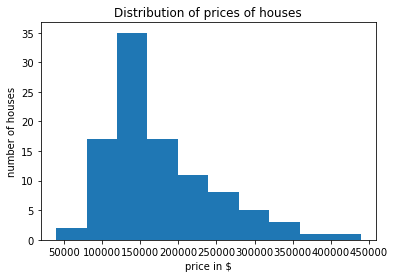

In [5]:
plt.hist(data["SalePrice"])
plt.title("Distribution of prices of houses")
plt.xlabel("price in $")
plt.ylabel("number of houses")

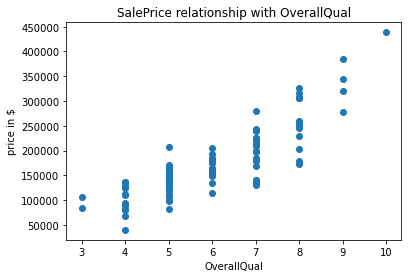

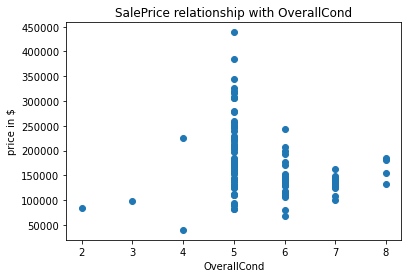

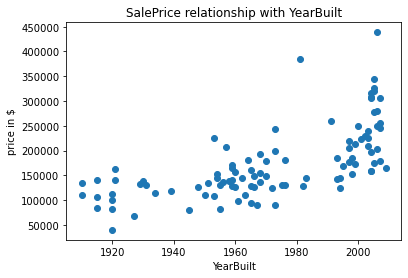

In [6]:
properties = ["OverallQual", "OverallCond", "YearBuilt"]

for i in properties:
    plt.figure()
    plt.title(f"SalePrice relationship with {i}")
    plt.ylabel("price in $")
    plt.xlabel(i)
    plt.scatter(data[i], data["SalePrice"])

It seems that not all of my assumtions were correct. All the plots show how this properties correlate with SalePrice, the first one - overall quality of the house shows some positive correcation as the price of a house rises with the rise of a quality of the house.The same is with the year the house was built in, though the correlation is smaller. But with overall condition of the house on the second plot the price of the house doesn't correlate at all, may be because the description of this property doesn't state what a condition of the house is exactely.

[Back to top](#Index)

### 2.3 Data Preparation

The next step of my project is data cleaning. At first I looked at how many messing values my data has. Columns "Unnamed: 0", and "Id" doesn't represent anything informative for a Machine Learning model I will build later, so I will remove them now. Also, I will drop all the columns that has more than 15% missing values.

In [7]:
data.isna().sum()[data.isna().sum() > 0]

LotFrontage      14
Alley            94
BsmtQual          3
BsmtCond          3
BsmtExposure      3
BsmtFinType1      3
BsmtFinType2      3
FireplaceQu      54
GarageType        6
GarageYrBlt       6
GarageFinish      6
GarageQual        6
GarageCond        6
PoolQC          100
Fence            77
MiscFeature      91
dtype: int64

In [8]:
data.drop(["Unnamed: 0", "Id"], axis=1, inplace=True)
data.dropna(thresh=85, axis=1, inplace=True)

The next step is checking whether my dataset has any duplicate rows, it seems there is no.

In [9]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows : ", duplicate_rows.shape[0])

Number of duplicate rows :  0


Now, when the dataset is left with some minor missing values I will remove all the columns that contain only one single possible value(there is 2 such columns at the moment), then I will replace all the numerical missing values with the mean of all the non-missing values.

In [10]:
print(f"Number of missing values: {data.isna().sum()[data.isna().sum() > 0].sum()}")

Number of missing values: 59


In [11]:
for key, value in data.iteritems():
    if data[key].dtypes in ["Int64", "float64"]:
        data[key].fillna(data[key].mean(), inplace=True)

In [12]:
data = data.loc[:, data.nunique() > 1]

In [13]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,84,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
print(f"Number of missing values: {data.isna().sum()[data.isna().sum() > 0].sum()}")

Number of missing values: 39


The important part of my cleaning is __removing the nominal values__ from the dataset. I hope in the near future I will complete the project with converting all of the nominal values into dummy values, but for now to not to make this project and model very complex I will omit them.

In [15]:
numeric = data.select_dtypes(include=[np.number])

The next step is removing outliers, I have recently completed a Machine Learning course from Akita University in Japan and not that long ago I have created a project where I used removal of outliers, and I found this technic very helpful as it allows to build a model with a smaller amount of observations, but only if the quality of this observations is high enough. So, have a look at the ouliers I've found.

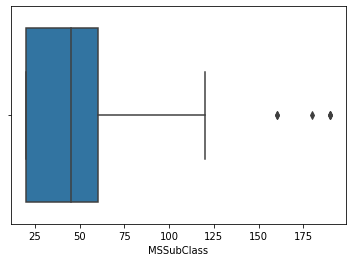

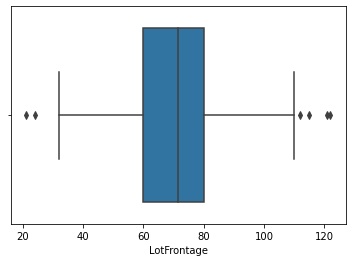

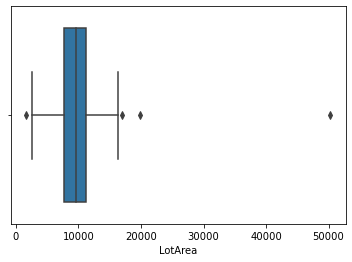

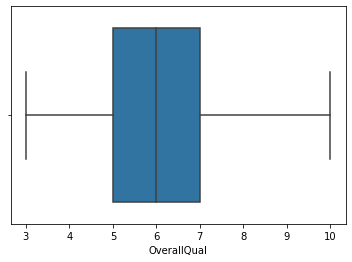

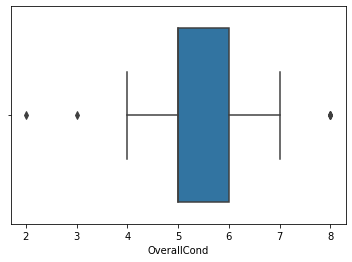

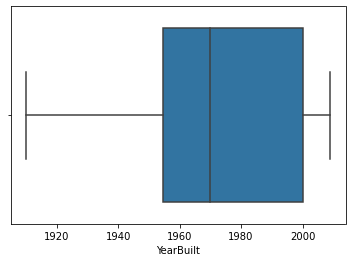

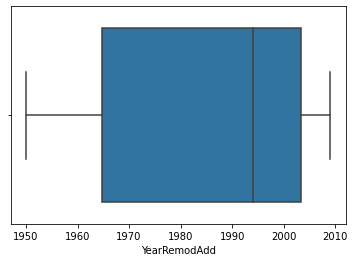

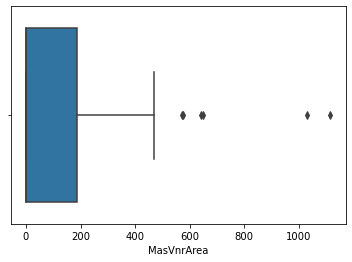

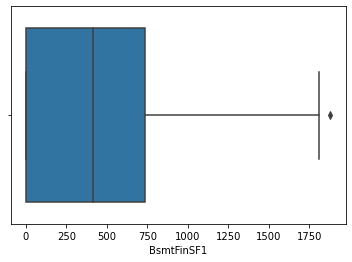

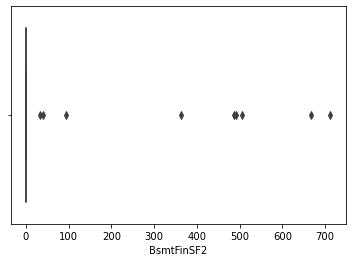

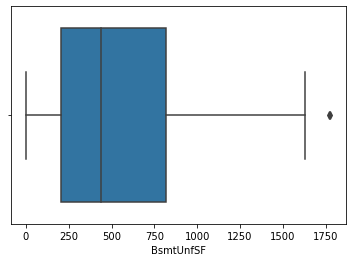

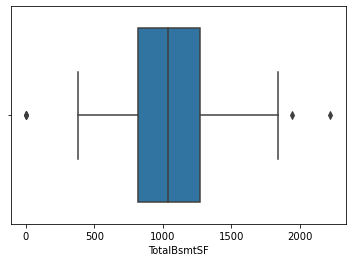

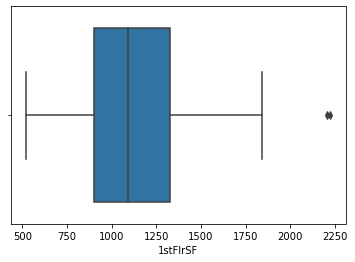

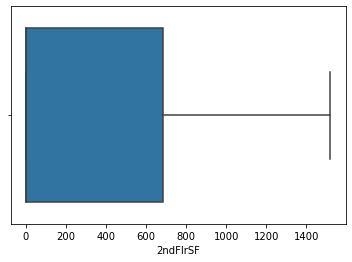

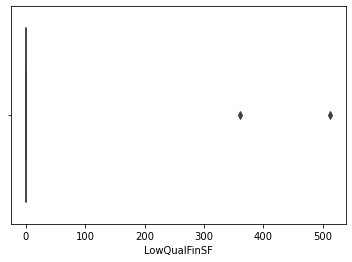

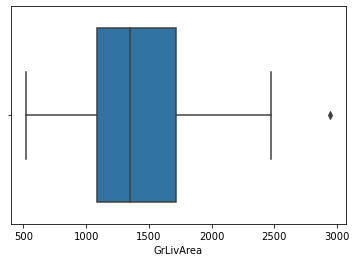

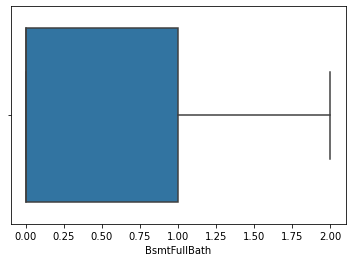

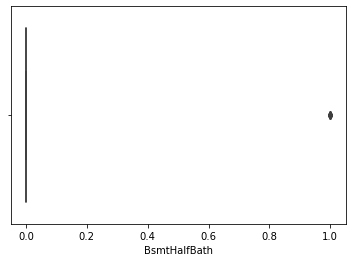

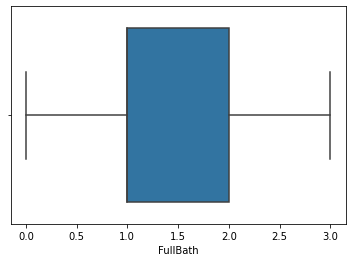

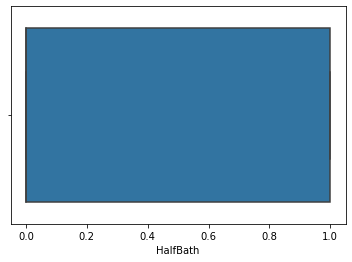

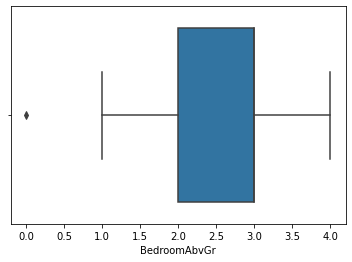

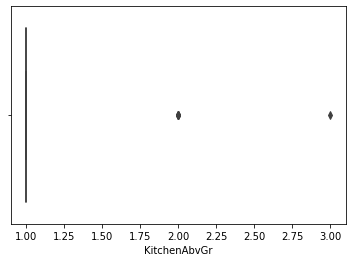

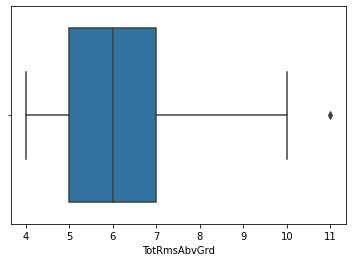

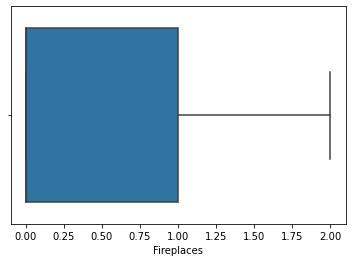

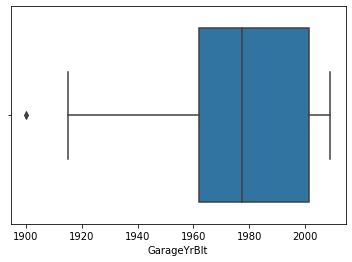

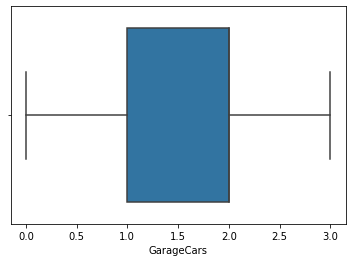

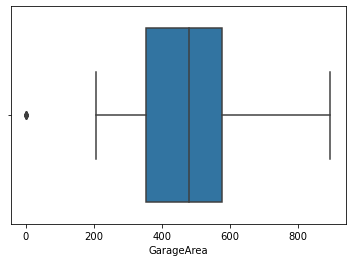

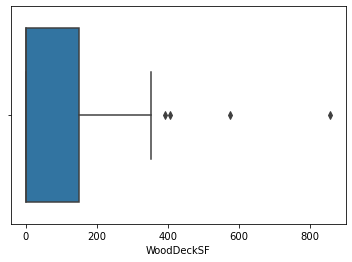

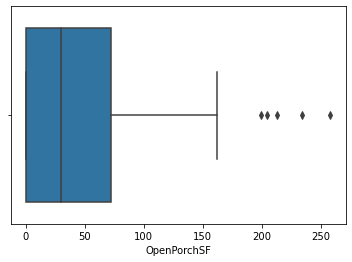

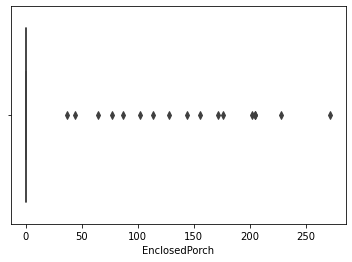

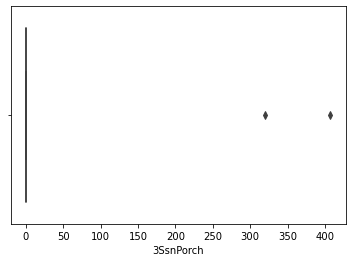

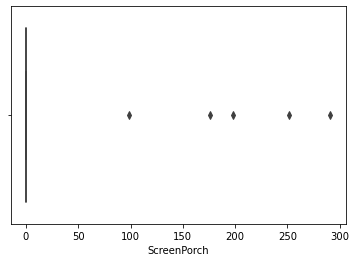

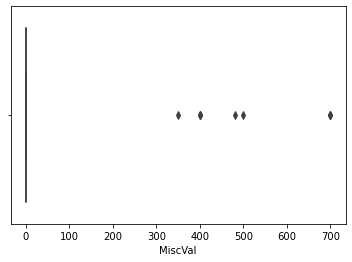

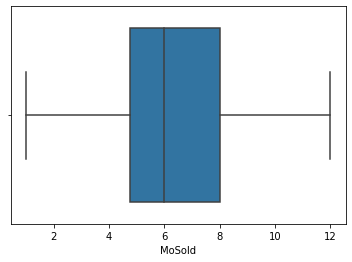

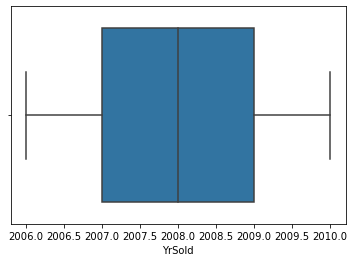

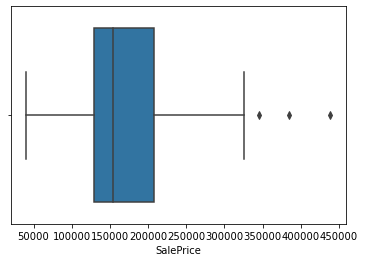

In [16]:
def find_outliers(data):
    for key, value in data.iteritems():
        plt.figure()
        sns.boxplot(x=data[key])
        
find_outliers(numeric)

Next I will implement a Z-score, which is a numerical measurement that describes a value's relationship to the mean of the group to which a value belongs to. I imported this function from the scipy library.

In [17]:
z = np.abs(stats.zscore(numeric))

numeric_without_outliers = numeric[(z<3).all(axis=1)]

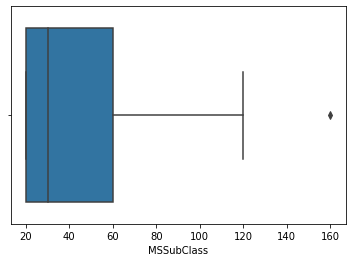

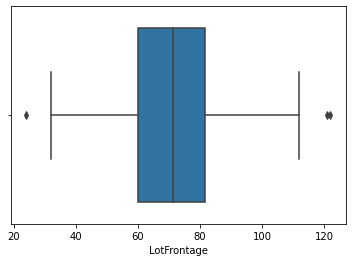

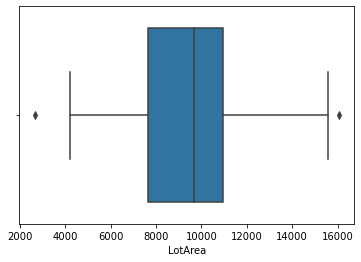

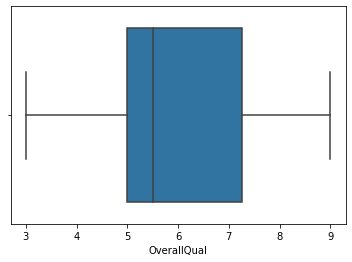

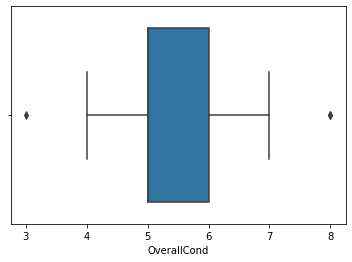

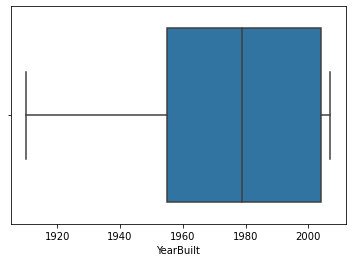

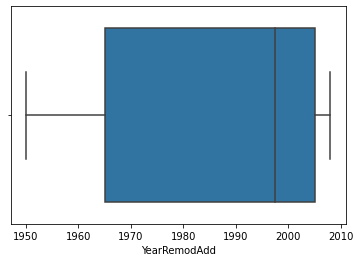

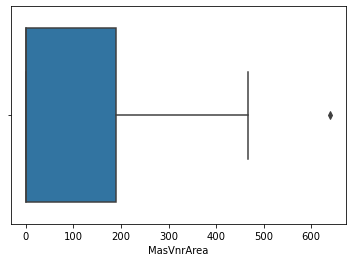

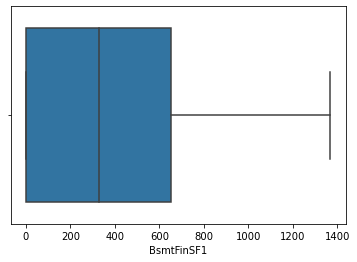

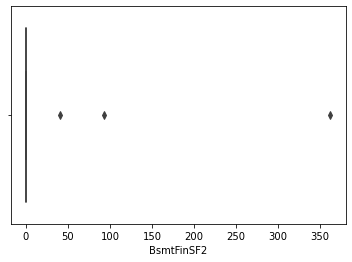

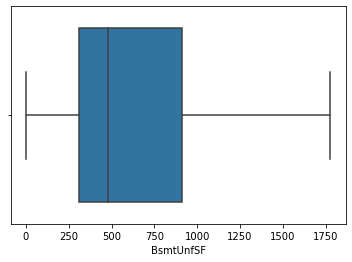

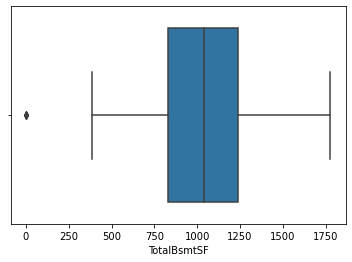

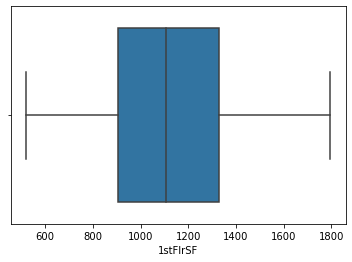

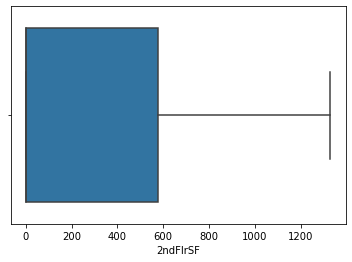

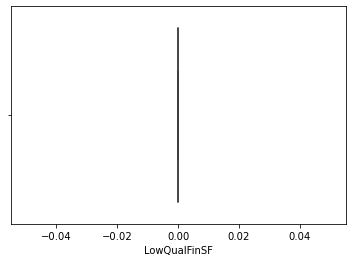

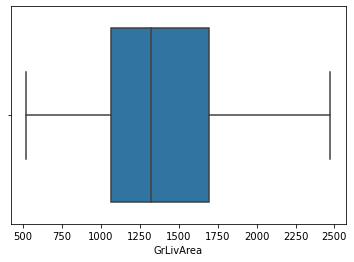

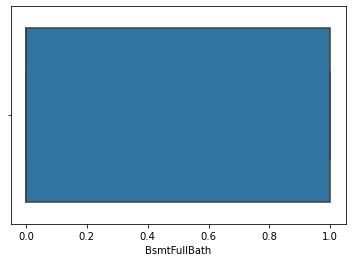

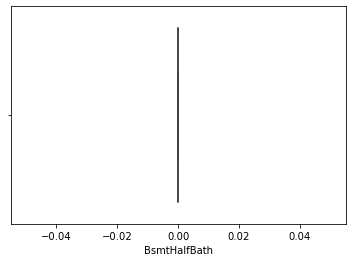

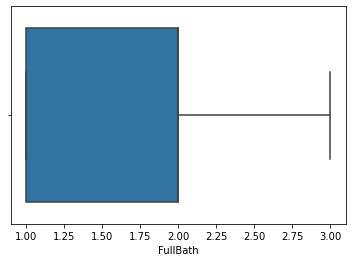

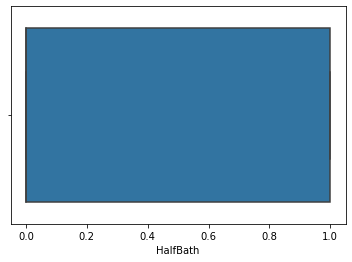

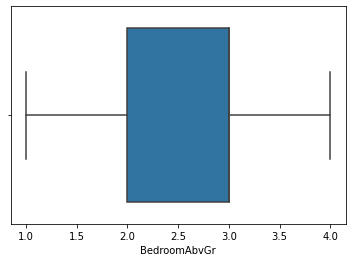

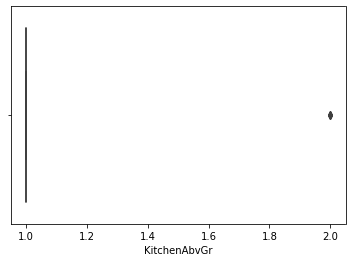

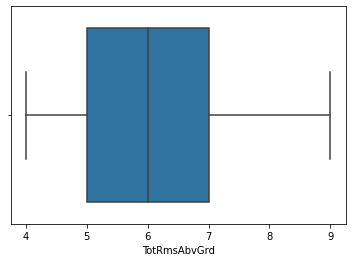

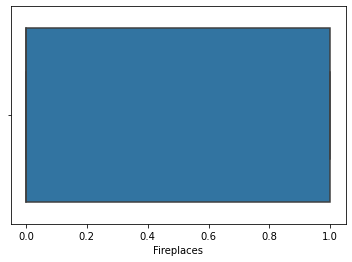

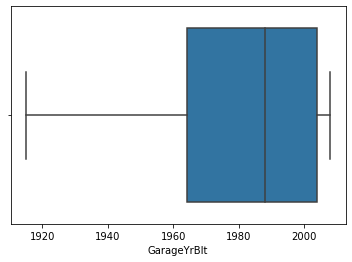

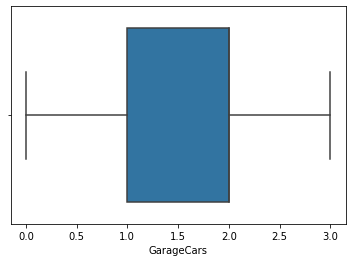

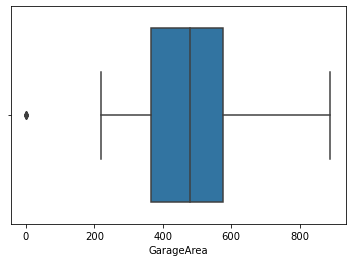

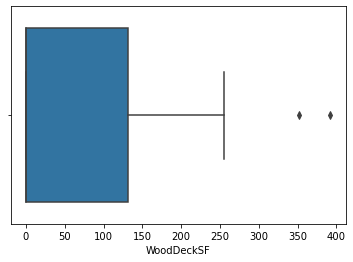

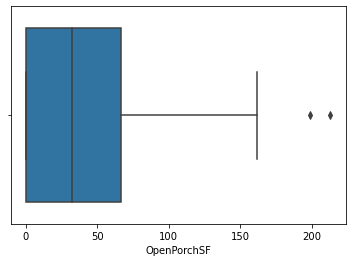

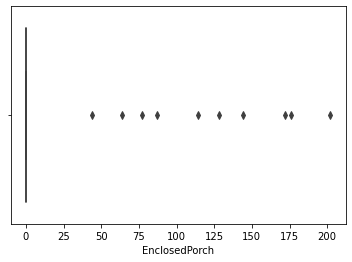

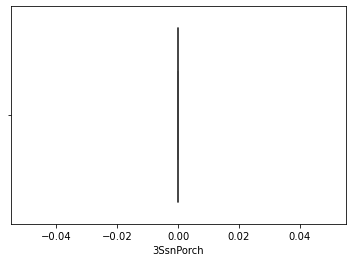

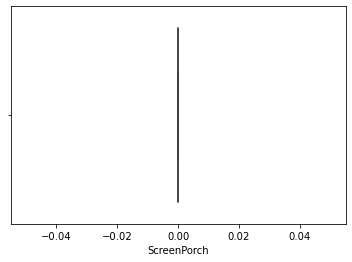

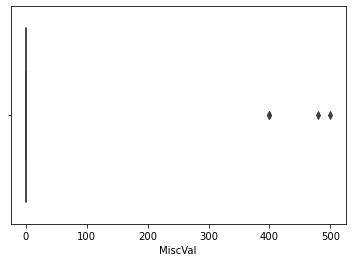

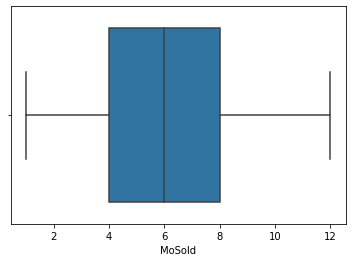

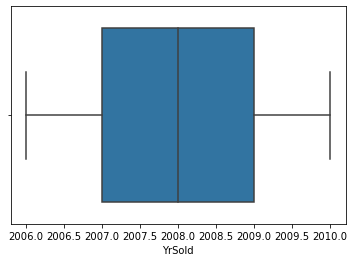

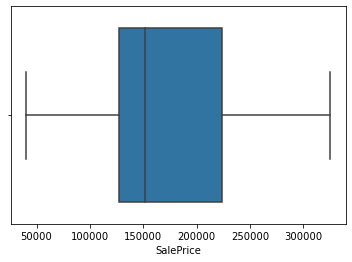

In [18]:
find_outliers(numeric_without_outliers)

Some properties with low variance remained, but I will remove them later when I will use the most correlated variables, as this are not correlated with the dependent variable. Below are displayed both numeric and numeric without outliers dataframes to show the difference, before removing the outliers the dataset contained 100 instances, but after the removal it contains only 87, I discovered that without outliers model performs up to 10 percent better on the train set and up to 5 on the test.

In [19]:
numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,2,2008,208500
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,5,2007,181500
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,9,2008,223500
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,2,2006,140000
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,71.406977,9765,6,8,1993,1993,68.0,310,0,...,420,232,63,0,0,0,480,4,2009,185000
96,20,78.000000,10264,7,5,1999,1999,183.0,1162,0,...,472,158,29,0,0,0,0,8,2006,214000
97,20,73.000000,10921,4,5,1965,1965,48.0,520,0,...,432,120,0,0,0,0,0,5,2007,94750
98,30,85.000000,10625,5,5,1920,1950,0.0,108,0,...,366,0,0,77,0,0,400,5,2010,83000


In [20]:
numeric_without_outliers

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,2,2008,208500
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,9,2008,223500
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,12,2008,250000
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,636,255,57,0,0,0,0,8,2007,307000
10,20,70.000000,11200,5,5,1965,1965,0.0,906,0,...,384,0,0,0,0,0,0,2,2008,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,71.406977,9765,6,8,1993,1993,68.0,310,0,...,420,232,63,0,0,0,480,4,2009,185000
96,20,78.000000,10264,7,5,1999,1999,183.0,1162,0,...,472,158,29,0,0,0,0,8,2006,214000
97,20,73.000000,10921,4,5,1965,1965,48.0,520,0,...,432,120,0,0,0,0,0,5,2007,94750
98,30,85.000000,10625,5,5,1920,1950,0.0,108,0,...,366,0,0,77,0,0,400,5,2010,83000


In conclusion I will say that cleaning the data in my opinion is the most important part of building a ML Model and accuracy of model greatly depends on quality of cleaning. Before cleaning I had 82 columns and 100 rows, after cleaning the dataset is left with 64 rows and 36 columns.

[Back to top](#Index)

### 2.4 Correlation

Below I created a heatmap of 14 most correlated with SalePrice properties, thus properties, that vary together with the price of the house. Almost all the properties in the cleaned dataset have positive correlation with the price, some are negative but they are near the 0 so there is no correlation with them at all. The most correlated properties are OverallQual, GrLivArea, YearBuilt, GarageCars, FullBath, GarageYrBlt and GarageArea. Correlation gives a big insight into making a ML model, because the properties that are not correlated with the target property act like a junk among the usefull staff, they worsen a model. There is only 14 of the most correlated values, i.e almost all the values that have a correlation with the dependent variable > 60. So, later I will explore what is the most optimal number of variables.

Text(0.5, 1.0, 'Pearson Correlation')

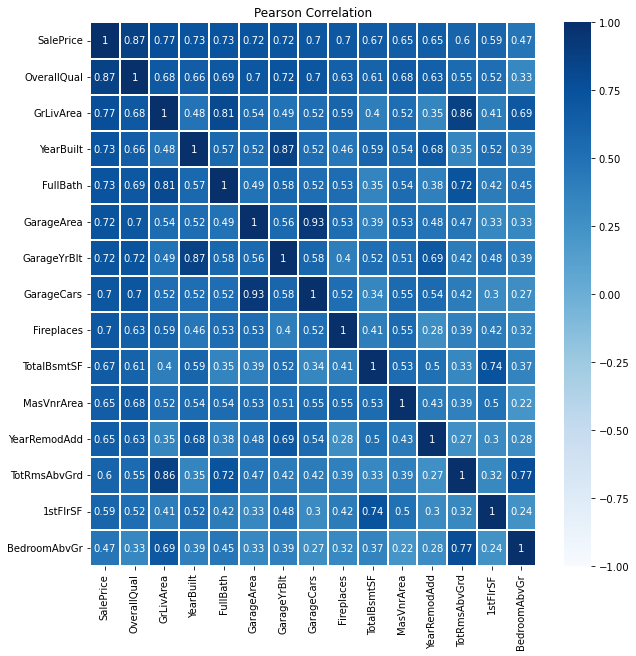

In [31]:
corr = numeric_without_outliers.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:15].index

pearsonCorr = numeric_without_outliers[cols].corr(method='pearson')
fig = plt.subplots(figsize=(10, 10))
sns.heatmap(pearsonCorr, vmin=-1,vmax=1, cmap = "Blues", annot=True,
linewidth=0.1)
plt.title("Pearson Correlation")


[Back to top](#Index)

## 3. Project Description


I have chosen 32 sets of independent variables to build ML models, I decided to chech which number of the most correlated variables leads to the best performance of the model. This sets are the extend to the sets that Dr. Williams have chosen, they give broader understanding of how the number of properties affect the performance of the model. Because I removed the outliers from the dataset (all other cleaning procedures are pretty much the same) the performance of my models are better than Dr. Williams'. However, I tried using not consecutive correlated values and I got worse results. So, I can say that using consecutive most correlated values is the best approach to build a good model, but the number of such values should be determined, because increasing the number of independent variables does not cause score increasing.

[Back to top](#Index)

### 3.1 Linear Regression

Linear Regression originally comes from the field of statistics, where it is used to understand the relationship between input and output numerical variables. In Machine Learning it belongs to the class of Supervised Learning, where your main goal is predicting the target variable (label). LR allows predicting the value of a dependent variable based on the values of one or more independent variables. All values have to be numeric for the algorithm to work. When the independent variable is one the algorithm is called Simple Linear Regression, when more than one – Multiple Linear Regression.


Simple Linear Regression assumes that two variables are linearly related. The main goal of implementing the algorithm is to find the linear function predict the dependent value (y) based on the value of the independent value (x) and represents a line that fits in the scatter plot of corresponding values of x and y. This line is called the regression line and is represented as:

$y = B_0 + B_1*x$,

where $y$ represents a predicted value $y$,<br>
x represents a value of independent variable,<br>
coefficient $B_0$ represents the intercept of the line,<br>
coefficient $B_1$ represents the slope of the line<br>

To create a model values of the coefficients must be estimated, to find the best coefficients the Least Squared principle should be applied.

$y = B_0 + B_1 * x + e => e = y - B_0 + B_1 * x$

where $e$ is a residual error and the goal is to minimize it.


To find the smallest error there must be found values of $B_0$ and $B_1$ that will give the smallest value $J(B_0, B_1)$

$J(B_0, B_1) = \frac{1}{2n} * \sum_{i=1}^{n}e^2$

Therefore:

$B_1 = \frac{SS_(xy)}{SS_(xx)}$

$B_0 = \bar{y} - B_1 * \bar{x}$

where $SS_(xy)$ is the sum of cross-deviations of y and x:

$SS_(xy) = \sum_{i=1}^{n}y_ix_i - n\bar{x}\bar{y}$

and $SS_(xx)$ is the sum of squared deviations of x:

$SS_(xx) = \sum_{i=1}^{n}(x_i)^2 - n\bar{x}^2$

Here is an implementation of a Simple Linear Regression in Python:
```
def estimate_coefficients(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y 
    mean_x = np.mean(x)
    mean_y = np.mean(y)
  
    # calculating the sum of cross-deviations of y and x 
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    # calculating the sum of squared deviations of x
    SS_xx = np.sum(x*x) - n*mean_x**2
  
    # calculating regression coefficients
    B_1 = SS_xy / SS_xx
    B_0 = mean_y - B_1*mean_x
  
    return (B_0, B_1)
```

After calculating the coeficients a regression line can be plotted and some metric could be used to estimate the performance of the model.

Multiple Linear Regression is the extension of a Simple LR, it allows to model the relationship between two or more independent variables and one dependent variable. It's represented by:

$y = B_0 + B_1*x_1 + B_2*x_2 + ... + B_p*x_p + e$,

in addition to the Simple LR's coefficients it has additional ones:<br>
slope coefficients $B_p$ for each independent variable<br>
$x_p$ - independent variable

Algorithm to find $B_0$...$B_p$ coefficients is more complex than finding the coefficients of Simple LR, it involves a lot of manipulations with matrixes.

Code to define a linear regression object: `reg = linear_model.LinearRegression()`
  

In my project I will implement both the Simple and Multiple Linear Regressions.

[Back to top](#Index)

### 3.2 Analysis 

For analysis I decided to take a combination of from one to 30 independent variables and find the best best result a model will give. Then I will walk through the best sets of variables. Also I will include some models with differently correlated variables, to show that the best variables to use are the most correlated.

In [22]:
def train_model(data):
    """Function created to show how the accuracy improves after increasing the number of independent variables"""
    train_temp = data
    training_list = []
    # chose from 1 to 30 independent variables to train models
    for i in range(2, 32):
        train = train_temp
        corr = train.corr()
        #choose the variables
        cols = corr['SalePrice'].sort_values(ascending=False)[0:i].index

        #create a training set of features
        train_x = train[cols].drop(['SalePrice'], axis=1)
        #training set of a target variable
        train_y = train['SalePrice']
        
        #creation of Linear Regression Model 
        lr = linear_model.LinearRegression()
        model = lr.fit(train_x, train_y)

        predictions = model.predict(train_x)
        
        training_list.append(model.score(train_x, train_y))

    #displaying the list of all the combinations of independent variables to compute the value of dependent
    result = pd.Series(training_list, index=range(1,31), name="Train Score")
    print(f"R^2 is:\n{result}")

In [33]:
def model(stop, step=1):
    """Function created to build a model on a defined set of variables"""
    train = numeric_without_outliers
    corr = train.corr()
    cols = corr['SalePrice'].sort_values(ascending=False)[0:stop:step].index

    train_x = train[cols].drop(['SalePrice'], axis=1)
    train_y = train['SalePrice']

    lr = linear_model.LinearRegression()
    model = lr.fit(train_x, train_y)

    predictions = model.predict(train_x)

    result = model.score(train_x, train_y)

    print(f"Properties that will be used to predict the sale price: {list(cols)[1:]}")
    print(f"\nR^2 is: {result}")
    print(f"\nCoeficients: {model.coef_}")
    print(f"\nPoint of interception: {model.intercept_}")
    
    plt.xlabel("Predicted value")
    plt.ylabel("Actual value")
    plt.scatter(predictions, train_y)
    
    plt.figure()
    plt.title("Error")
    plt.hist(train_y - predictions)

The sets of variables I decided to use to show some graphs are following: ['OverallQual', 'GrLivArea', 'YearBuilt', 'FullBath', 'GarageArea', 'GarageYrBlt', 'GarageCars', 'Fireplaces', 'TotalBsmtSF'], ['GrLivArea', 'FullBath', 'GarageYrBlt', 'Fireplaces'], ['YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'OpenPorchSF'] 

[Back to top](#Index)

### 3.3 Results

I will be using the $R^2$ score to measure the ability of my model to fit correctly data. It's a coefficient of determination which determines how well the regression predictions approximate the real data points. 

The first model is the one that uses: 'OverallQual', 'GrLivArea', 'YearBuilt', 'FullBath', 'GarageArea', 'GarageYrBlt', 'GarageCars', 'Fireplaces', 'TotalBsmtSF' properties to predict the SalePrice. It showed an accuracy score of 0.895, which is a very good result, even better than professor got in his implementation of the model. The error histogram is bell-shaped as it should be.

Properties that will be used to predict the sale price: ['OverallQual', 'GrLivArea', 'YearBuilt', 'FullBath', 'GarageArea', 'GarageYrBlt', 'GarageCars', 'Fireplaces', 'TotalBsmtSF']

R^2 is: 0.8953766893685586

Coeficients: [ 1.18148182e+04  3.58423858e+01  4.02053827e+02  7.67556292e+03
  5.61228904e+01 -1.82136663e+01 -4.30785940e+02  1.92555202e+04
  3.09091939e+01]

Point of interception: -782272.0030184177


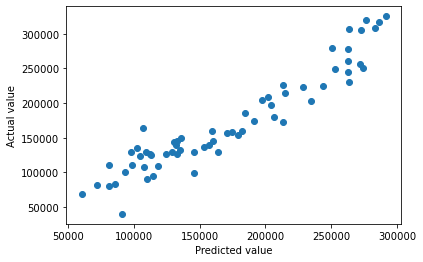

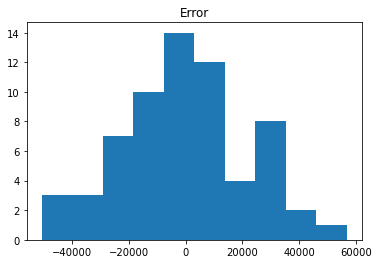

In [34]:
model(10)

The second model uses a smaller in number and worse-correlated variables: 'GrLivArea', 'FullBath', 'GarageYrBlt', 'Fireplaces'. And has accuracy of 0.8, which is worse than a previous model, error distribution is not as bell-shaped as a distribution of errors of previous model. It's all because of the properties of this variables I predefined at the beginning.

Properties that will be used to predict the sale price: ['GrLivArea', 'FullBath', 'GarageYrBlt', 'Fireplaces']

R^2 is: 0.8004204310163787

Coeficients: [   56.50857948  7672.99391875  1031.85209838 44209.10089465]

Point of interception: -1976263.995112463


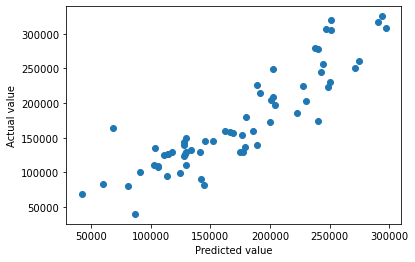

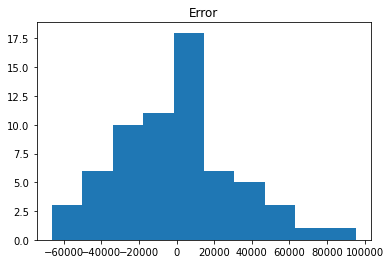

In [35]:
model(10, 2)

The third model uses even more less correlated variables: 'YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'OpenPorchSF'. And has accuracy score of 0.73, which is the worst result of all three models. The distribution of errors is also not as bell-shaped as the distribution of previous 2 models. 

Properties that will be used to predict the sale price: ['YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'OpenPorchSF']

R^2 is: 0.737403602713381

Coeficients: [  700.47543265   364.60662218    47.99153021 17345.66344086
   109.74869149]

Point of interception: -2095050.3860213459


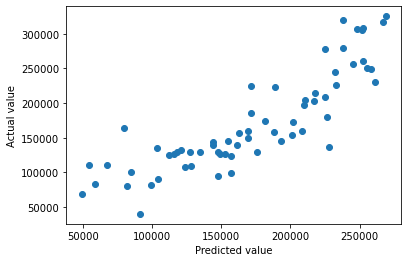

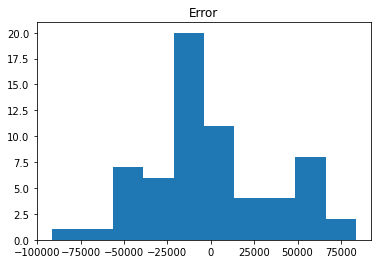

In [26]:
model(16, 3)

The next step of building the best model is to choose the best number of independent variables. So, below are the results of using 1 to 30 independent variables to predict the SalePrice. Even if I use only one variable - OverallQual I can predict the price of the house with 0.76 accuracy, which is quite hard, if I use 2 most correlated variables the accuracy becomes 0.816. The more variables model recieves the better the result it gives, which is a good way to show how a model can become biased. It learns some patterns in the train set and to avoid such thing there is a need to test model on the test set. So, I cannot give an answer which variables are the best to predict the SalePrice, but in the next paragraph I will test my model on a test set and will be able to give an answer.

In [27]:
train_model(numeric_without_outliers)

R^2 is:
1     0.759997
2     0.816574
3     0.855808
4     0.855998
5     0.867248
6     0.869305
7     0.869573
8     0.878657
9     0.895377
10    0.896163
11    0.906333
12    0.909655
13    0.911040
14    0.912394
15    0.917646
16    0.917992
17    0.919297
18    0.924385
19    0.928372
20    0.928372
21    0.930138
22    0.930321
23    0.930334
24    0.939316
25    0.943891
26    0.943891
27    0.944367
28    0.945061
29    0.956302
30    0.959335
Name: Train Score, dtype: float64


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

After inspecting a test set I discovered some missing value and in order for my model to work I need to replace the numerical missing values with the mean of the property they belong to.

In [28]:
test = pd.read_csv("jtest.csv")
test_save = test
test_numeric = numeric_without_outliers

for key, value in test.iteritems():
    if test[key].dtypes in ["Int64", "float64"]:
        test[key].fillna(test[key].mean(), inplace=True)
        
test

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,72.910256,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.000000,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.000000,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.000000,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,72.910256,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.000000,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.000000,9416,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.000000,25419,Pave,NaN,Reg,Lvl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.000000,5520,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


One interesting thing I realized is that my train dataset is smaller than a test - 64 instances vs 100, so I think that accuracy could be improved if I have a more standart train/test size of a datasets, lets say 80/20 or 70/30. Nevertheless I repeated the actions I have made in the previous paragraph when I used a test set to show how the accuracy of model performing on the train and test sets. It is obvious that the result of the model on the unseen data is worse than on the train data because the bias is removed and all the patterns a model took from a train set doesn't apply to the test set.

In [44]:
prediction_14 = 0

d = {"train":[], "test":[]}

for i in range(2, 32):
    test = test_save
    numeric = test_numeric
    corr = numeric.corr()
    cols = corr['SalePrice'].sort_values(ascending=False)[0:i].index
    
    train_x = numeric[cols].drop(['SalePrice'], axis=1)
    train_y = numeric['SalePrice']

    lr = linear_model.LinearRegression()
    model = lr.fit(train_x, train_y)

    predictions = model.predict(train_x)
    
    d["train"].append(model.score(train_x, train_y))
    test_x = test[cols].drop(['SalePrice'], axis=1)
    test_y = test['SalePrice']
    
    predictions = model.predict(test_x)
    if i == 15:
        prediction_14 = predictions
    d["test"].append(model.score(test_x, test_y))

result = pd.DataFrame(d, index=range(1, 31))

result

,train,test
1,0.759997,0.561683
2,0.816574,0.698723
3,0.855808,0.697856
4,0.855998,0.705156
5,0.867248,0.732836
6,0.869305,0.724155
7,0.869573,0.726623
8,0.878657,0.758047
9,0.895377,0.764341
10,0.896163,0.760279


So, 14 best correlated with SalePrice properties used in building the model show the best performance: 'OverallQual', 'GrLivArea', 'YearBuilt', 'FullBath',  'GarageArea', 'GarageYrBlt', 'GarageCars', 'Fireplaces', 'TotalBsmtSF', 'MasVnrArea', 'YearRemodAdd', 'TotRmsAbvGrd', 'stFlrSF', 'BedroomAbvGr'. $R^2 = 0.793$, which is better than the performance of the professor's model.

<AxesSubplot:xlabel='Predicted value', ylabel='SalePrice'>

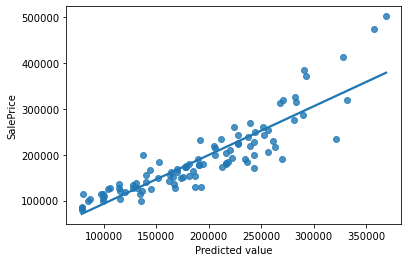

In [45]:
plt.xlabel("Predicted value")
sns.regplot(prediction_14, test_y, ci=None)

Below is the distribution of accuracies than model got on a test set.

Text(0.5, 1.0, 'Distribution of accuracies')

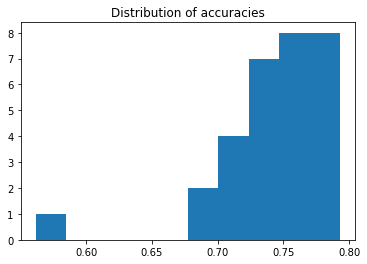

In [30]:
plt.hist(result['test'])
plt.title("Distribution of accuracies")

After using 18 most correlated values in building the model the accuracy becomes decreasing, that is because all the other properties have low correlation with the target variable and their usage only worsen the result.

[Back to top](#Index)

## Conclusion

From the time I have become working on the project I decided that I want to test a lot of different models with different amount of the most correlated properties, and I implemented all the things I have planned. The best score I recieved is $R^2 = 0.793$ on my test set, it's better than the professors score, but it's not very good to use this model to predict a price. If better data cleaning was held and train dataset was bigger I think that I could get a score of 0.85 or even 0.90. May be using a different prediction algorithm, other than a Linear Regression can lead to the better score. Nevertheless, I am ok with my model and I think that the result of the performance is great.


[Back to top](#Index
)
## References

- Brownlee, Jason. “Linear Regression for Machine Learning” Machine Learning Mastery. March 25, 2016. https://machinelearningmastery.com/linear-regression-for-machine-learning/.
- Hayes, Adam. “Z-Score” Investopedia. July 02, 2022. https://www.investopedia.com/terms/z/zscore.asp
- Fernando, Jason. “R-Squared Formula, Regression, and Interpretations” Investopedia. September 12, 2021. https://www.investopedia.com/terms/r/r-squared.asp
- GeeksforGeeks. "Linear Regression (Python Implementation)" GeeksforGeeks. Aug 22, 2022. https://www.geeksforgeeks.org/linear-regression-python-implementation/